# Lab2: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [6]:
import seaborn as sns
import pandas as pd

### Read the csv data into a pandas dataframe and display the first 5 samples

In [7]:
import pandas as pd
data= pd.read_csv('estate.csv')
estate = pd.DataFrame(data)
estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [8]:
# showing more info about the real estate dataset
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [9]:
# finding data samples which is the same as no. of rows
samples = estate.index
col = estate.columns
print("There are ",len(samples),"samples and ",len(col),"columns")

There are  414 samples and  8 columns


### What are the features available in the dataset?

In [10]:
# the features available in the dataset is the same as the colums
features = estate.columns
features

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [11]:
# check if any feature has a missing data
missing = estate.isna()
missing

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


### Group all the features as dependent features in X

In [12]:
# grouping my inputs variable X
X = estate.loc[:,['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [13]:
# subseting independent feature y
y = estate['Y house price of unit area']
y.reset_index()

,index,Y house price of unit area
0,0,37.9
1,1,42.2
2,2,47.3
3,3,54.8
4,4,43.1
...,...,...
409,409,15.4
410,410,50.0
411,411,40.6
412,412,52.5


### Split the dataset into train and test data

In [43]:
# importing model selection from skit learn
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X, y,train_size=0.5,test_size=0.5,random_state=123) 
train_y

136    46.8
402    28.5
258    63.3
234    23.9
345    37.9
       ... 
230    33.4
98     51.0
322    33.1
382    29.3
365    29.5
Name: Y house price of unit area, Length: 207, dtype: float64

### Choose the model (Linear Regression)

In [60]:
# my model from scikit learn
from sklearn import linear_model


### Create an Estimator object

In [61]:
mymodel = linear_model.LinearRegression()


### Train the model

In [62]:
fi = mymodel.fit(train_X,train_y)
fi

LinearRegression()

### Apply the model

In [91]:
# pridictions
my_predictions = mymodel.predict(test_X)
my_predictions

array([42.019932  , 46.27325015, 39.05087983, 38.95077514, 48.6666401 ,
       51.49066805, 41.93196675, 44.72388933, 25.9634469 , 39.70063483,
       42.94967135, 44.44384881, 31.28977963, 35.17187963, 40.14298715,
       17.13412972, 47.90994434, 46.81488872, 35.6890004 , 42.61202159,
       15.19874639, 39.32586875, 34.83419179, 40.788244  , 45.23069124,
       52.55468179, 13.55798868, 44.06304076, 14.14280357, 44.42861614,
       12.749339  , 45.7507833 , 28.30546983, 42.43897808, 17.09545783,
       37.04806398, 43.48486184, 37.67735033, 43.70701238, 34.75751266,
       50.0959697 , 44.67064271, 34.49839186, 25.64155037, 33.02559527,
       47.87704241, 41.12279202, 44.26382977, 38.26729071, 28.30546983,
       42.95048912, 42.46503297, 46.37114123, 26.66275634, 33.91956348,
       29.55465019, 49.6054755 , 36.90465221, 36.48875431, 34.4944564 ,
       38.14926329, 29.89385238, 13.40483547, 31.43649893, 45.31108878,
       45.86456747, 45.49172148, 36.98455138, 38.23373744, 34.17

### Display the coefficients

In [64]:
mymodel.coef_

array([ 6.44807823e+00, -2.08862462e-01, -4.65064839e-03,  9.51866479e-01,
        2.11476139e+02, -1.03652608e+01])

### Find how well the trained model did with testing data

In [92]:
from sklearn import metrics

mymodel.score(test_X, test_y)

0.6745626350389484

### Plot House Age Vs Price
#### Hint: Use regplot in sns

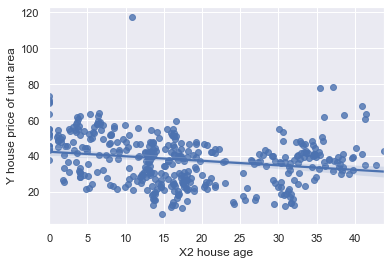

In [81]:
import seaborn as sns; sns.set_theme(color_codes=True)

# now ploting
ha_p = sns.regplot(x="X2 house age", y="Y house price of unit area", data=estate, scatter=True)
ha_p;

### Plot Distance to MRT station Vs Price

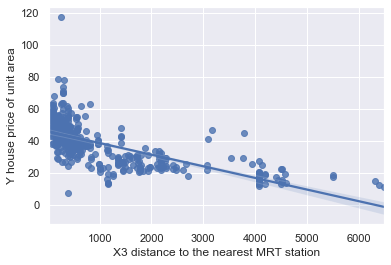

In [86]:
dist_p = sns.regplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=estate,scatter=True)
dist_p;

### Plot Number of Convienience Stores Vs Price

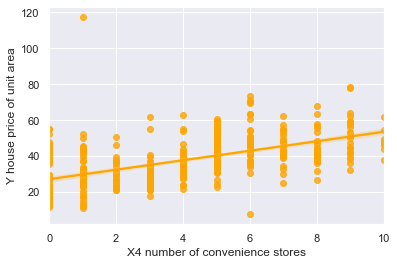

In [85]:
con_p = sns.regplot(x='X4 number of convenience stores',y='Y house price of unit area',data=estate, scatter=True, color='orange')
con_p;